# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# Reading the data and calling the csv file

In [3]:
sales= pd.read_csv('Advertising.csv', index_col=0 )

In [4]:
sales.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
sales.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [6]:
sales.shape

(200, 4)

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [8]:
sales.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

# Univariate analysis

In [9]:
sales.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


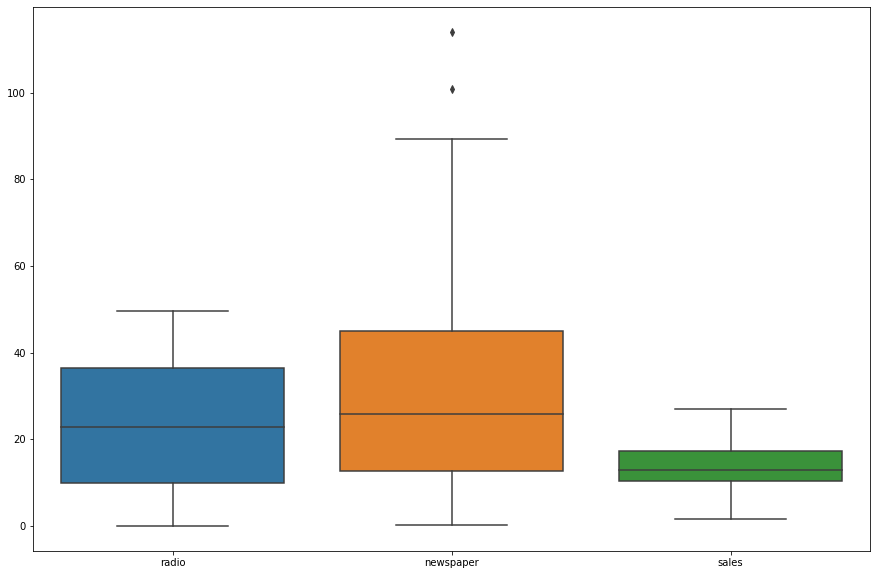

In [10]:
sns.boxplot(data=sales[['radio', 'newspaper', 'sales']])
fig=plt.gcf()
fig.set_size_inches(15,10)

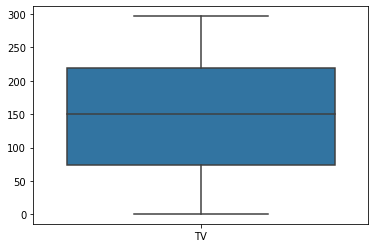

In [11]:
sns.boxplot(data=sales[['TV']])

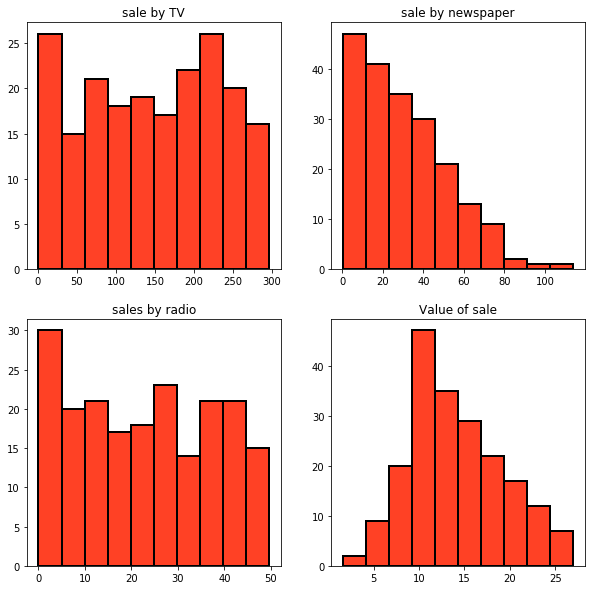

In [12]:

fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="TV",data=sales,edgecolor="black",linewidth=2,color='#ff4126')
axes[0,0].set_title("sale by TV")
axes[0,1].hist(x="newspaper",data=sales,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,1].set_title("sale by newspaper")
axes[1,0].hist(x="radio",data=sales,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,0].set_title("sales by radio")
axes[1,1].hist(x="sales",data=sales,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,1].set_title("Value of sale")
fig.set_size_inches(10,10)

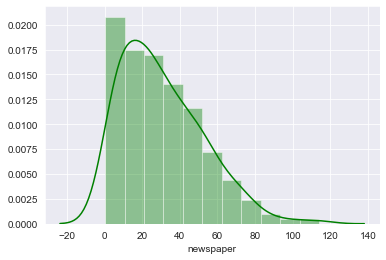

In [13]:
sns.set_style('darkgrid')
sns.distplot(sales['newspaper'],color = 'green')
plt.show()

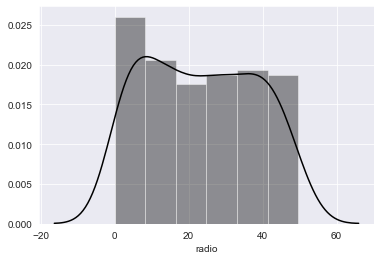

In [14]:
sns.set_style('darkgrid')
sns.distplot(sales['radio'],color = 'black')
plt.show()

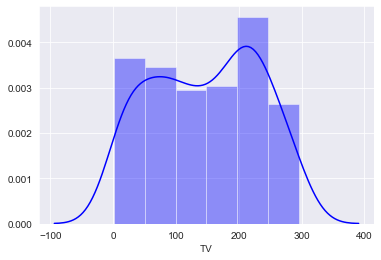

In [15]:
sns.set_style('darkgrid')
sns.distplot(sales['TV'],color = 'blue')
plt.show()

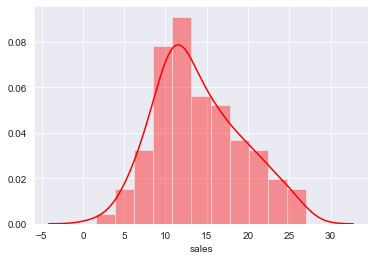

In [16]:
sns.set_style('darkgrid')
sns.distplot(sales['sales'],color = 'red')
plt.show()

# Bivariate analysis

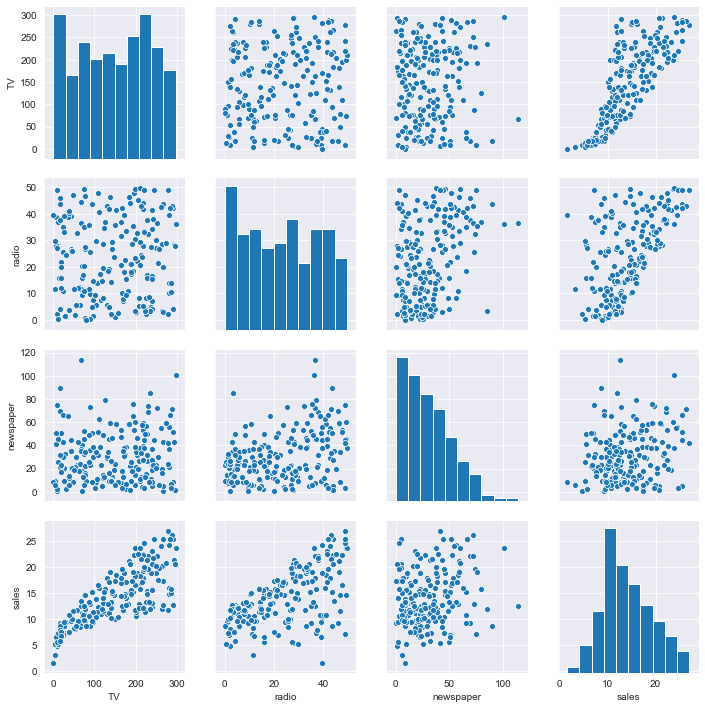

In [17]:
sns.pairplot(sales[['TV','radio','newspaper','sales']])


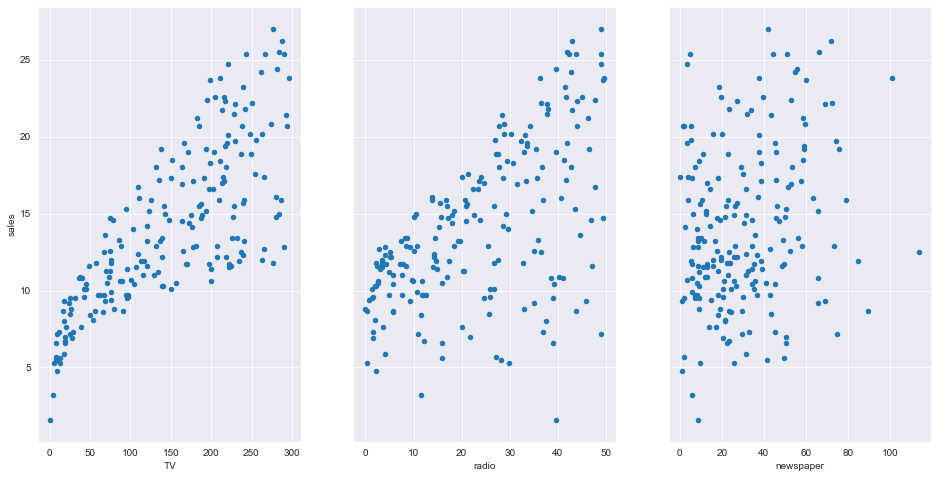

In [18]:
fig,axs= plt.subplots(1,3,sharey=True) # sharey : share same y axis across the plot
sales.plot(kind="scatter",x='TV',y='sales',ax=axs[0],figsize=(16,8))
sales.plot(kind="scatter",x='radio',y='sales',ax=axs[1],figsize=(16,8))
sales.plot(kind="scatter",x='newspaper',y='sales',ax=axs[2],figsize=(16,8))



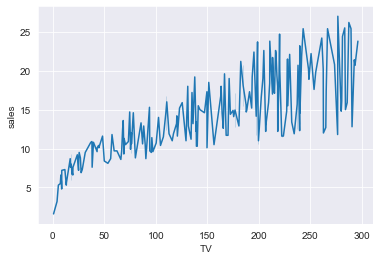

In [19]:
 sns.lineplot(x='TV',y='sales',data=sales)

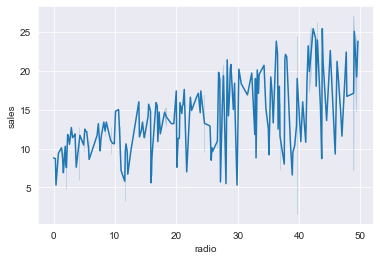

In [20]:
 sns.lineplot(x='radio',y='sales',data=sales)

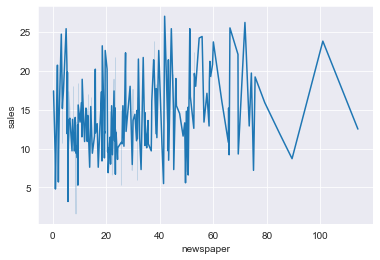

In [21]:
 sns.lineplot(x='newspaper',y='sales',data=sales)

In [22]:
sales.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


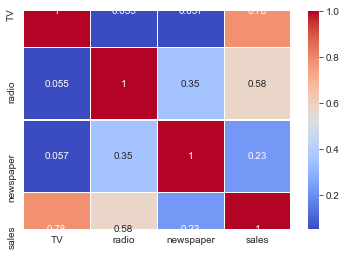

In [23]:
sns.heatmap(sales.corr(),cmap = 'coolwarm', linecolor = 'white', linewidths=0.1,annot=True)
plt.show()

# Model building

In [24]:
x = sales.drop(['sales'],axis=1)
y = sales.sales

In [25]:
x.shape

(200, 3)

In [26]:
x.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


# Linear regression

In [29]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [30]:
Linearmodel = linear_model.LinearRegression()
Linearmodel.fit(x_train, y_train)
r2_score(y_train, Linearmodel.predict(x_train))

0.890307557755665

In [31]:
r2_score(y_test,Linearmodel.predict(x_test))

0.9156213613792232

# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [42]:
r2_score(y_train,dt.predict(x_train))

1.0

In [43]:
r2_score(y_test,dt.predict(x_test))

0.9494081999600055

I am rejecting decision tree as it overfits the data because r2 value in 1 and test accuracy is .94 which is good but i still want to see how random forest model perform.
If test r2 value of random forest is more than .94 will select random forest model

# Random forest

In [32]:
random_model = RandomForestRegressor()
random_model.fit(x_train, y_train)
r2_score(y_train, random_model.predict(x_train))

C:\Users\ankit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9928378229660447

In [33]:
r2_score(y_test, random_model.predict(x_test))

0.9759874125206622

In [39]:
feature_importances = pd.DataFrame(random_model.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [40]:
feature_importances

,importance
TV,0.629510
radio,0.351421
newspaper,0.019069


Hyperparameter tuning and cross validaing before selecting final model

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
params = {
    'max_depth': [5,10, 15, 20, 25, None],    
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [25, 50, 100, 200]}

grid_search_rf = GridSearchCV(random_model, params, cv = 3)


In [48]:
grid_search_rf.fit(x_train, y_train) 

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [5, 10, 15, 20, 25, No

In [49]:
r2_score(y_train, grid_search_rf.predict(x_train)) 

0.9960030380341482

In [50]:
r2_score(y_test, grid_search_rf.predict(x_test))

0.9810073199449384

In [56]:
#Best RF model after hyperparameter tuning
random_model=RandomForestRegressor(criterion='mse',bootstrap=True,
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False)

In [58]:
random_model.fit(x_train, y_train)
r2_score(y_train, random_model.predict(x_train))

0.9926854916669963

In [59]:
r2_score(y_test, random_model.predict(x_test))

0.9769788065261796

In [60]:
feature_importances = pd.DataFrame(random_model.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [61]:
feature_importances

,importance
TV,0.664370
radio,0.327413
newspaper,0.008217


I am selecting random forest model as best model as its r2 value in test data is .98 which is very good.
Here our aim is not to get the best predictions but to know which channels would be good for advertisement to get the best revenue

By looking at variable importance above i can conclude that newspaper is not important for revenue generation and therefore it is recommended to not spend any money on newspaper add.

I would recommend the company to spend 66.4% of their advertisement budjet on TV add and 32.7% on Radio